# Applying data visualization concepts to a database with funds citation

<font color='yellow'>Project description:</font> apply data visualization concepts to validate the daily funds citation in municipalities in Rio Grande do Sul/Brazil, considering the GDP.

<font color='yellow'>Directory for the database:</font> displayed in the project folder.

<font color='yellow'>Languages used for this project:</font> Python.

<font color='yellow'>Project information:</font>
* Database: dados.csv
* Valid entries:
    * City code (CODIGO)
    * City (MUNICIPIO)
    * GDP (PIB)
    * Funds citation (VALOREMPNEHO)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

In [2]:
dataset = pd.read_csv('dados.csv', sep=';')
dataset.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [3]:
dataset.shape

(187, 4)

In [4]:
dataset.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [5]:
dataset[dataset.duplicated(['CODIGO', 'PIB', 'VALOREMPENHO'], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [6]:
dataset.drop_duplicates(subset=['CODIGO', 'PIB', 'VALOREMPENHO'], keep='first', inplace=True)
dataset.shape

(177, 4)

In [7]:
dataset.groupby(['MUNICIPIO']).size()

MUNICIPIO
AGUDO                         1
AJURICABA                     1
ALECRIM                       1
ALMIRANTE TAMANDARE DO SUL    1
ALTO FELIZ                    1
                             ..
VERA CRUZ                     1
VIADUTOS                      1
VICTOR GRAEFF                 1
VILA MARIA                    1
VILA NOVA DO SUL              1
Length: 172, dtype: int64

C:\Users\wellb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PIB')

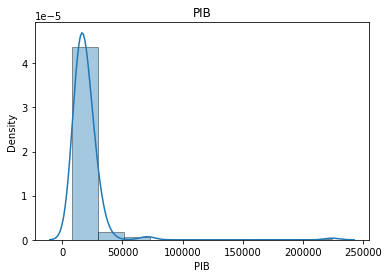

In [8]:
srn.distplot(dataset.PIB, bins=10, axlabel='PIB', hist=True, hist_kws={'edgecolor': 'black'}).set_title('PIB')

C:\Users\wellb\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Valor do Empenho')

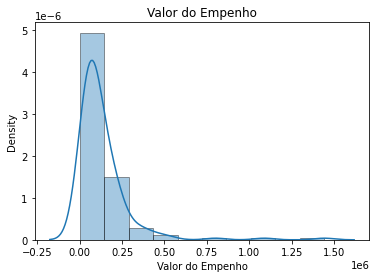

In [9]:
srn.distplot(dataset.VALOREMPENHO, bins=10, axlabel='Valor do Empenho', hist=True, 
             hist_kws={'edgecolor': 'black'}).set_title('Valor do Empenho')

<AxesSubplot:xlabel='MUNICIPIO'>

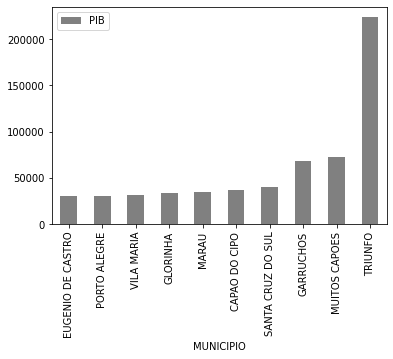

In [10]:
pib_agrupado = dataset.sort_values(['PIB']).tail(10)
pib_agrupado.plot.bar(x='MUNICIPIO', y='PIB', color='gray')

<AxesSubplot:xlabel='MUNICIPIO'>

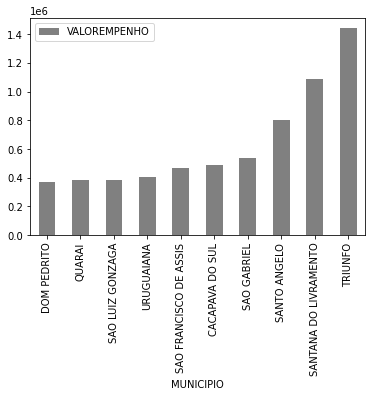

In [11]:
empenho_agrupado = dataset.sort_values('VALOREMPENHO').tail(10)
empenho_agrupado.plot.bar(x='MUNICIPIO', y='VALOREMPENHO', color='gray')